No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


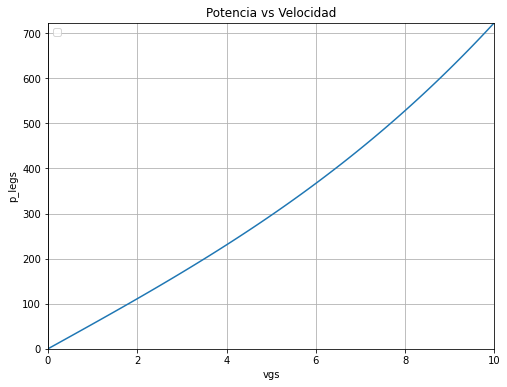

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Punto 1
# Inspección gráfica
vgs = np.linspace(start=0, stop=10, num=101)  # Cambiado el rango de vgs a valores positivos
g = 9.81 
w = 83.50
alpha = 6.2/100
crr = 5e-3
cdA = 0.35 
ro = 1 
vhw = 0  
lossdt = 2/100
distancia_cuchilla = 11.12 #kms

def ec1(vgs):
    return vgs * (((g * w * np.sin(alpha)) + (g * w * np.cos(alpha)) * crr) + (1/2 * cdA * ro * (vhw) ** 2)) + cdA * ro * vhw * vgs ** 2 + (1/2 * cdA * ro * vgs ** 3)

p_legs = ec1(vgs)


plt.figure(figsize=(8, 6))
plt.plot(vgs, p_legs)
plt.xlabel('vgs')
plt.ylabel('p_legs')
plt.title('Potencia vs Velocidad')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(0, 10)
plt.ylim(0, max(p_legs))  
plt.show()


<ipython-input-11-ab62804f4479>:1: RuntimeWarning: divide by zero encountered in divide
  tiempo_cuchilla = distancia_cuchilla/vgs
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


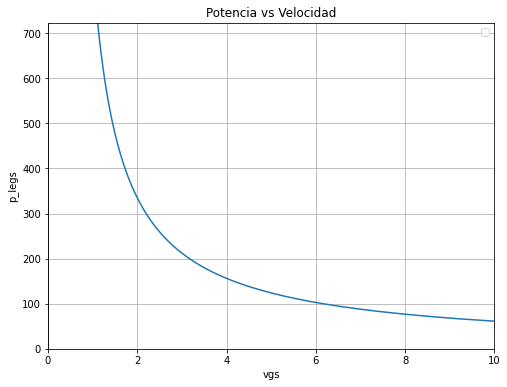

In [11]:
tiempo_cuchilla = distancia_cuchilla/vgs

plt.figure(figsize=(8, 6))
plt.plot(tiempo_cuchilla, p_legs)
plt.xlabel('vgs')
plt.ylabel('p_legs')
plt.title('Potencia vs Velocidad')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(0, 10)
plt.ylim(0, max(p_legs))  
plt.show()